# <font color='blue'>Desafio Movehub City</font>



## Definindo o Problema de Negócio

O dataset <b>Movehub City</b>, se refere a uma métrica onde mostra o ranking das melhores cidades para se viver.

Para avaliar se uma cidade é boa para se viver, é necessário levar alguns pontos em consideração, como por exemplo:

- Se a cidade possui uma boa localidade;
- População tem uma boa qualidade de vida
- População com salários maiores que a média;
- Se a chances de crescimento em termo de valorização do local;
- Segurança do local;
- Existe pouca taxa de crime;
- Entre outras avaliações.

Pesquisando sobre o dataset para entender mais da regra de negócio, existe uma variável que se chama <b>Movehub Rating</b>, que é a combinação de todas as pontuações para realizar a classificação geral da cidade.

Portando <b>Movehub Rating</b> será a variável dependente, enquanto as demais seram variáveis independente.

Para realizar a previsão deste modelo, será necessário considerar os fatores existentes dentro do conjunto de dados, poís eles contribuem para a obtenção do resultado do ranking.

O modelo tem como objetivo realizar previsão dos dados, para classificar o ranking da cidade, no qual se refere se é boa para se viver.

Será utilizado o Matplotlib e Seaborn para criação dos gráficos.

Utilizando Scikit-Learn, será utilizada para implementação de um algoritmo de regressão para a modelagem dos dados.

In [1]:
# Importando as bibliotecas

import os
path = os.getcwd()

import numpy as np # Utilizado para operações matemáticas
import pandas as pd # Utilizado para visualização, análise e manipulação dos dados
import matplotlib as mpl # Utilizado para criação de gráficos
import matplotlib.pyplot as plt
import seaborn as sns # Utilizado para criação de gráficos

from sklearn import linear_model # Algoritmo para utilizar o modelo de regressão
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

%matplotlib inline

import warnings # Utilizado para não mostrar avisos na execução do código
warnings.filterwarnings("ignore")

## Carregando os dados dos datasets

In [2]:
# Carregando os datasets

df_cidades = pd.read_csv("dataSets/cities.csv", sep = ',', encoding = "utf8")
df_custo = pd.read_csv("dataSets/movehubcostofliving.csv", sep = ',', encoding = "utf8")
df_qualidade_vida = pd.read_csv("dataSets/movehubqualityoflife.csv", sep = ',', encoding = "utf8")

## Análise exploratória e tratamento dos Dados

In [3]:
# Visualizando as primeiras linhas do primeiro dataset

df_cidades.head()

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


In [4]:
# Visualizando primeiras linhas do segundo dataset

df_custo.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [5]:
# Visualizando primeiras linhas do terceiro dataset

df_qualidade_vida.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86





Abaixo, pode perceber que os datasets <b>df_custo e df_qualidade_vida</b>, tem o mesmo número de linhas e colunas


In [6]:
# Verificando a quantidade de linhas e colunas de cada dataset

print('\nLinha e Coluna\n')

print('df_cidades:', df_cidades.shape)
print('df_custo:', df_custo.shape)
print('df_qualidade_vida:', df_qualidade_vida.shape)


Linha e Coluna

df_cidades: (3543, 2)
df_custo: (216, 7)
df_qualidade_vida: (216, 7)


In [7]:
# Verificando o tipo dos dados do dataset df_cidades

df_cidades.dtypes

City       object
Country    object
dtype: object

In [8]:
# Verificando o tipo dos dados do dataset df_custo

df_custo.dtypes

City                      object
Cappuccino               float64
Cinema                   float64
Wine                     float64
Gasoline                 float64
Avg Rent                 float64
Avg Disposable Income    float64
dtype: object

In [9]:
# Verificando o tipo dos dados do dataset df_qualidade_vida

df_qualidade_vida.dtypes

City                object
Movehub Rating     float64
Purchase Power     float64
Health Care        float64
Pollution          float64
Quality of Life    float64
Crime Rating       float64
dtype: object

In [10]:
# Sumário estatístico do dataset df_cidades

df_cidades.describe()

,City,Country
count,3543,3540
unique,3489,175
top,City,China
freq,24,435





A coluna <b>Avg Rent(Média do valor do aluguel)</b> e <b>Avg Disposable Income(Renda média avaliado)</b>
tem uma variação grande entre o valor mínimo e máximo. Portando, as duas informações pode ter alguma relação. Quanto mais a pessoa ganha de renda, ela pode pagar alugueis mais caros, porém é necessários levar outros fatores em consideração.

Já da pra se ter uma ideia, que o valor cobrado do <b>Cinema</b>, pode ter valor(es) outliers ou os valores mais caros pode ser devido oferecer serviços diferenciados e/ou local do Cinema.

As colunas Cinema, Wine, Avg Rend, Avg Disposable Income, tem valores que variam muito em relação a média.

Iremos verificar nos gráficos.

In [11]:
# Sumário estatístico do dataset df_custo

df_custo.describe()

,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.981481,6.775602,7.079722,1.001898,1092.979213,1413.530463
std,0.737131,5.632751,3.325691,0.351713,664.778486,912.013027
min,0.460000,1.810000,2.130000,0.070000,120.680000,120.680000
25%,1.320000,4.397500,4.260000,0.735000,609.015000,549.860000
50%,2.085000,6.540000,6.540000,0.950000,980.650000,1535.415000
75%,2.490000,7.850000,8.472500,1.320000,1388.095000,2053.812500
max,4.480000,79.490000,26.150000,1.690000,5052.310000,4266.110000




A coluna <b>Pollution(Poluição)</b> tem valor mínimo de 0, pode ser um erro na hora de coletar os dados.
Teria que investigar mais.

Referente as outras colunas, termos uma grande variação entre valor mínimo e máximo referente ao valor da cidade ser boa ou não para se viver.

In [12]:
# Sumário estatístico do dataset df_qualidade_vida

df_qualidade_vida.describe()

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,79.676713,46.477176,66.442824,45.240370,59.994537,41.338611
std,6.501011,20.614519,14.416412,25.369741,22.019376,16.416409
min,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,75.070000,28.815000,59.420000,24.410000,42.752500,29.375000
50%,81.060000,49.220000,67.685000,37.210000,65.150000,41.140000
75%,84.020000,61.607500,77.207500,67.675000,78.617500,51.327500
max,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000




Em <b>df_cidades</b>, pode perceber que a coluna Country tem 3 linhas a menos na coluna Country.
<br/>

Será necessário verificar.

In [13]:
# Verificando dados faltantes (missing)

print('\n* df_cidades:\n')
df_cidades.info()

print('\n\n')

print('* df_custo:\n')
df_custo.info()

print('\n\n')

print('* df_qualidade_vida:\n')
df_qualidade_vida.info()


* df_cidades:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
City       3543 non-null object
Country    3540 non-null object
dtypes: object(2)
memory usage: 55.4+ KB



* df_custo:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
City                     216 non-null object
Cappuccino               216 non-null float64
Cinema                   216 non-null float64
Wine                     216 non-null float64
Gasoline                 216 non-null float64
Avg Rent                 216 non-null float64
Avg Disposable Income    216 non-null float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB



* df_qualidade_vida:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
City               216 non-null object
Movehub Rating     216 non-null float64
Purchase Power     216 non-null float64
Health Care        216 non-null

In [14]:
# Vamos verificar onde está os dados faltantes

print('\ndf_cidades:\n')
df_cidades[df_cidades['Country'].isnull()]


df_cidades:



,City,Country
654,Sevastopol,NaN
724,Simferopol,NaN
1529,Priština,NaN




Ao realizar busca em: https://en.wikipedia.org/wiki/List_of_towns_and_cities_with_100,000_or_more_inhabitants/cityname:_A

para as cidades Sevastopol, Simferopol e Priština, as cidades pertence aos países Ukraine, Russia e Kosovo.

Portanto, será adicionado o nome dos paises nas linhas faltantes.

Posteriomente é verificado que as colunas City e Coutry tem o mesmo número de linhas.

In [15]:
# Adicionar os nomes dos países nas linhas faltantes

df_cidades.iloc[654,1]='Ukraine'
df_cidades.iloc[724,1]='Russia'
df_cidades.iloc[1529,1]='Kosovo'

In [16]:
# Verificando novamente dados faltantes (missing) do dataset df_cidades

print('\n* df_cidades:\n')
df_cidades.info()


* df_cidades:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
City       3543 non-null object
Country    3543 non-null object
dtypes: object(2)
memory usage: 55.4+ KB


In [17]:
# Verificando se tem valores NA(nulos), dataset df_cidades

df_cidades.isna().sum()

City       0
Country    0
dtype: int64

In [18]:
# Verificando se tem valores NA(nulos), dataset df_custo

df_custo.isna().sum()

City                     0
Cappuccino               0
Cinema                   0
Wine                     0
Gasoline                 0
Avg Rent                 0
Avg Disposable Income    0
dtype: int64

In [19]:
# Verificando se tem valores NA(nulos), dataset df_qualidade_vida

df_qualidade_vida.isna().sum()

City               0
Movehub Rating     0
Purchase Power     0
Health Care        0
Pollution          0
Quality of Life    0
Crime Rating       0
dtype: int64



Todos os três datasets tem a coluna <b>City</b> que realiza a união entre as váriaveis.
Portando vamos unir os datasets, começando pelo dataset <b>df_custo</b> e <b>df_qualidade_vida</b> que contém o mesmo número de linhas.

In [20]:
# Unindo os datasets df_custo e df_qualidade_vida
df_movehubcity = pd.merge(df_custo, df_qualidade_vida, how='outer')

# Realizando a união pela váriavel City
df_movehubcity = df_movehubcity.sort_values(by='City')

# Resetando o índice
df_movehubcity.reset_index(drop=True)

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32
5,Ahmedabad,0.72,2.11,4.22,0.85,193.08,301.69,76.16,33.69,61.67,68.21,57.01,18.18
6,Alicante,1.28,6.01,4.03,1.19,511.49,852.48,82.83,44.69,75.61,28.19,72.53,44.01
7,Amman,2.55,6.54,12.79,0.83,460.92,441.94,74.40,21.22,75.37,61.63,39.57,46.74
8,Amsterdam,2.09,8.52,4.26,1.45,1513.16,1747.59,84.00,47.18,68.06,53.42,72.85,29.76
9,Antalya,1.81,3.26,5.44,1.62,217.45,362.42,71.91,22.91,59.55,30.55,40.51,44.53


In [21]:
# Agora vamos unir o novo dataset df_movehubcity com o dataset df_cidades.
# Vamos manter todas as colunas da esquerda do df_movehubcity e considerar as que tiver dados da direita do df_cidades.

df_movehubcity = pd.merge(df_movehubcity, df_cidades, how='left')

# Realizando a união pela váriavel City
df_movehubcity = df_movehubcity.sort_values(by='City')

# Resetando o índice
df_movehubcity.reset_index(drop=True)

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,Germany
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22,United Kingdom
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86,United Arab Emirates
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04,Ethiopia
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32,Australia
5,Ahmedabad,0.72,2.11,4.22,0.85,193.08,301.69,76.16,33.69,61.67,68.21,57.01,18.18,India
6,Alicante,1.28,6.01,4.03,1.19,511.49,852.48,82.83,44.69,75.61,28.19,72.53,44.01,Spain
7,Amman,2.55,6.54,12.79,0.83,460.92,441.94,74.40,21.22,75.37,61.63,39.57,46.74,Jordan
8,Amsterdam,2.09,8.52,4.26,1.45,1513.16,1747.59,84.00,47.18,68.06,53.42,72.85,29.76,Netherlands
9,Antalya,1.81,3.26,5.44,1.62,217.45,362.42,71.91,22.91,59.55,30.55,40.51,44.53,Turkey


In [22]:
# Verificando em cada coluna, se tem valores faltantes 

df_movehubcity.isna().sum()

City                      0
Cappuccino                0
Cinema                    0
Wine                      0
Gasoline                  0
Avg Rent                  0
Avg Disposable Income     0
Movehub Rating            0
Purchase Power            0
Health Care               0
Pollution                 0
Quality of Life           0
Crime Rating              0
Country                  30
dtype: int64

</br>


Após a união dos dados, fica evidente que estamos com 30 valores faltantes na coluna <b>Country</b>.

A alternativa adotada, será adicionar o país nas linhas faltantes de acordo com a sua cidade.

In [23]:
# Mostrar as linhas que estão com valores faltantes da coluna Country

df_movehubcity[df_movehubcity['Country'].isnull()]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country
10,Asheville,1.80,5.88,7.85,0.64,1225.82,1898.54,83.17,70.51,79.02,30.55,81.34,30.21,NaN
51,Cebu,1.43,2.85,3.48,0.88,475.01,200.28,66.93,12.90,73.70,35.90,41.21,46.88,NaN
61,Cordoba,1.95,3.92,4.25,0.93,524.80,523.02,73.76,27.56,75.24,48.76,47.68,51.56,NaN
66,Davao,0.79,1.90,3.17,0.84,554.18,158.34,69.29,17.63,69.00,77.98,30.66,17.71,NaN
74,Dusseldorf,2.13,8.31,4.47,1.28,1193.48,2301.70,83.45,72.52,75.98,8.61,88.02,15.34,NaN
79,Frankfurt,2.13,7.67,4.07,1.36,1022.98,1875.46,82.75,62.60,65.33,14.54,88.04,27.55,NaN
81,Galway,2.13,7.67,6.39,1.39,852.48,1875.46,83.19,58.59,52.97,52.47,77.85,40.78,NaN
100,Istanbul,1.99,5.44,9.06,1.66,634.23,724.84,80.22,34.42,80.38,44.98,45.67,42.36,NaN
101,Izmir,1.81,4.71,7.25,1.69,543.63,590.57,76.07,32.12,57.33,30.55,42.90,25.91,NaN
122,Lodz,1.45,4.77,4.15,1.18,337.35,415.20,73.32,26.37,53.21,37.21,46.29,64.51,NaN


</br>


Por se trata de um dataset que já está pequeno, não vamos exluir as 30 linhas faltantes da coluna Country.
Realizando pesquisas e verificando na base dos datasets, os nomes das cidades estão diferentes, pode ser um dos motivos de não conseguir unir os dados.
Será corrigido abaixo os nomes das 30 linhas.

In [24]:
# Realizando a correção dos nomes

df_movehubcity.iloc[227,0]='Zürich'

df_movehubcity.iloc[224,0]='Washington, D.C.'

df_movehubcity.iloc[201,0]='Tampa, Florida'

df_movehubcity.iloc[188,0]='São Paulo'

df_movehubcity.iloc[185,0]='San Francisco, California'

df_movehubcity.iloc[184,0]='San Diego, California'

df_movehubcity.iloc[193,13]='Malta'

df_movehubcity.iloc[10,13]='United States'

df_movehubcity.iloc[51,13]='Philippines'

df_movehubcity.iloc[61,13]='Argentina'

df_movehubcity.iloc[66,0]='Davao City'

df_movehubcity.iloc[74,0]='Düsseldorf'

df_movehubcity.iloc[79,0]='Frankfurt am Main'

df_movehubcity.iloc[81,13]='Ireland'

df_movehubcity.iloc[100,0]='İstanbul'

df_movehubcity.iloc[101,0]='İzmir'

df_movehubcity.iloc[122,13]='Poland'

df_movehubcity.iloc[129,0]='Málaga'

df_movehubcity.iloc[130,0]='Malmö'

df_movehubcity.iloc[134,13]='Spain'

df_movehubcity.iloc[136,0]='Medellín'

df_movehubcity.iloc[139,0]='Miami, Florida'

df_movehubcity.iloc[141,0]='Minneapolis, Minnesota'

df_movehubcity.iloc[164,13]='Thailand'

df_movehubcity.iloc[166,0]='Philadelphia, Pennsylvania'

df_movehubcity.iloc[167,0]='Phoenix, Arizona'

df_movehubcity.iloc[168,0]='Portland, Oregon'

df_movehubcity.iloc[176,0]='Rio de Janeiro'

df_movehubcity.iloc[178,13]='United States'

df_movehubcity.iloc[183,0]='San Antonio, Texas'

In [25]:
# Realizar a união dos datasets novamente

df_movehubcity = pd.merge(df_movehubcity, df_cidades, how='inner', on='City')

In [26]:
# Mostrar as primeiras linhas

df_movehubcity.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country_x,Country_y
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,Germany,Germany
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22,United Kingdom,United Kingdom
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86,United Arab Emirates,United Arab Emirates
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04,Ethiopia,Ethiopia
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32,Australia,Australia


In [27]:
# Mostrar as últimas linhas

df_movehubcity.tail()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country_x,Country_y
242,Warsaw,1.66,5.19,5.19,1.18,726.59,664.31,76.76,35.77,63.33,86.16,51.82,32.03,Poland,Poland
243,"Washington, D.C.",2.37,7.85,7.85,0.69,2451.63,2484.32,81.74,56.61,64.44,30.55,76.92,51.43,NaN,United States
244,Wellington,2.20,8.82,8.27,1.17,1515.65,1763.67,81.06,49.11,73.72,30.55,79.83,27.38,New Zealand,New Zealand
245,Zagreb,1.12,3.70,4.48,1.23,504.36,605.23,73.84,26.71,52.78,83.45,47.59,32.29,Croatia,Croatia
246,Zürich,3.28,12.59,8.40,1.31,2378.61,4197.55,85.89,79.58,78.33,18.04,97.91,15.35,NaN,Switzerland


In [28]:
# Verificando novamente se tem valores faltantes

df_movehubcity.isna().sum()

City                      0
Cappuccino                0
Cinema                    0
Wine                      0
Gasoline                  0
Avg Rent                  0
Avg Disposable Income     0
Movehub Rating            0
Purchase Power            0
Health Care               0
Pollution                 0
Quality of Life           0
Crime Rating              0
Country_x                21
Country_y                 0
dtype: int64



Após mexer bastante nos dados, foi criado duas novas colunas, Country_x e Country_y.

Vamos deletar a coluna Country_x, já que a coluna Country_y está mais correta.

Também vamos renomear a coluna Coutry_y, mesmo nome do dataset bruto.

In [29]:
# Deletando a coluna Country_x que contém valores nulos

df_movehubcity = df_movehubcity.drop('Country_x', axis=1)

# Renomeando a coluna Country_y

df_movehubcity = df_movehubcity.rename(columns = {'Country_y': 'Country'})

In [30]:
# Mostrar as primeiras linhas

df_movehubcity.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,Germany
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22,United Kingdom
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86,United Arab Emirates
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04,Ethiopia
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32,Australia


In [31]:
# Verificando novamente se tem valores faltantes

df_movehubcity.isna().sum()

City                     0
Cappuccino               0
Cinema                   0
Wine                     0
Gasoline                 0
Avg Rent                 0
Avg Disposable Income    0
Movehub Rating           0
Purchase Power           0
Health Care              0
Pollution                0
Quality of Life          0
Crime Rating             0
Country                  0
dtype: int64

In [32]:
# Verificando se tem  dados duplicados por cidade

duplicados = df_movehubcity.City.value_counts()
duplicados.head(11)

Cambridge     9
Valencia      9
Birmingham    4
Colombo       4
Barcelona     4
Hamilton      4
Vancouver     4
Athens        4
London        4
Hyderabad     4
Taipei        1
Name: City, dtype: int64

In [33]:
# Visualizar um caso de campos com nomes de cidade duplicados

df_movehubcity[(df_movehubcity['City'] == 'Cambridge')]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country
49,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,United States
50,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,Canada
51,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,United Kingdom
52,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,United States
53,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,Canada
54,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,United Kingdom
55,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,United States
56,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,Canada
57,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,United Kingdom


In [34]:
# Pegar os dados que contém valores duplicados por cidade

df_movehubcity.set_index('City').index.get_duplicates()

Index(['Athens', 'Barcelona', 'Birmingham', 'Cambridge', 'Colombo', 'Hamilton',
       'Hyderabad', 'London', 'Valencia', 'Vancouver'],
      dtype='object', name='City')

Verificando e removendo dados duplicados.

In [35]:
# Vamos dropar as linhas que contém valores duplicados.
# Será considerado a cidade e país, já que pode existir várias cidades para o mesmo país.
# Caso tenha cidade e país iguais, será excluido os valores duplicados.

df_movehubcity = df_movehubcity.drop_duplicates(subset=['City', 'Country'])

In [36]:
# Verificando novamente se tem  dados duplicados por cidade

duplicados = df_movehubcity.City.value_counts()
duplicados.head()

Cambridge     3
Valencia      3
Birmingham    2
Colombo       2
Barcelona     2
Name: City, dtype: int64

In [37]:
# Visualizando se todos os campos com nomes de cidade duplicados, se são diferente.

df_movehubcity[(df_movehubcity['City'] == 'Cambridge')]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country
49,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,United States
50,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,Canada
51,Cambridge,1.99,8.22,7.97,1.39,1345.2,2730.26,82.15,54.76,81.48,57.18,70.61,24.22,United Kingdom


In [38]:
# Cidades que foram tratadas

nomes_das_cidades = df_movehubcity.City.value_counts()
nomes_das_cidades[nomes_das_cidades > 1]

Cambridge     3
Valencia      3
Birmingham    2
Colombo       2
Barcelona     2
Hamilton      2
Vancouver     2
Athens        2
London        2
Hyderabad     2
Name: City, dtype: int64

In [39]:
# Verificar o tamanho do dataset

df_movehubcity.shape

(219, 14)



Alguns nomes das colunas do dataset, contém caractere de dificil leitura para o computador.
Neste caso, seria o espaço entre nomes da varíavel.
Exemplo: Movehub Rating

Portanto vamos substituir os espaços por _

In [40]:
# Valor utilizar regex para substituir o espaço por _

df_movehubcity.columns = df_movehubcity.columns.str.replace(' ','_')


In [41]:
# Realizando resumo estatística com os dados mais tratado.

df_movehubcity.describe()

,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.986667,6.834155,7.113470,1.011963,1105.034384,1427.846027,79.896119,46.546164,66.517443,45.833333,59.865434,41.268995
std,0.742531,5.604582,3.305689,0.352639,670.672649,910.889913,6.508671,20.210330,14.358674,25.616140,22.006483,16.210121
min,0.460000,1.810000,2.130000,0.070000,120.680000,120.680000,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,1.315000,4.585000,4.260000,0.770000,607.890000,588.790000,75.375000,29.135000,59.635000,24.280000,42.735000,28.805000
50%,2.090000,6.820000,6.540000,0.980000,980.650000,1554.460000,81.060000,49.110000,67.780000,37.270000,64.890000,40.960000
75%,2.490000,7.970000,8.430000,1.330000,1419.290000,2058.720000,84.040000,61.175000,77.235000,67.995000,78.565000,51.010000
max,4.480000,79.490000,26.150000,1.690000,5052.310000,4266.110000,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000


In [50]:
# Filtrar a avaliação do Movehub Rating por cada cidade

selecionarColunas = ['City', 'Movehub_Rating']
cidade_ranking = df_movehubcity.filter(items = selecionarColunas)

cidade_ranking.head(10)

,City,Movehub_Rating
0,Aachen,81.64
1,Aberdeen,81.89
2,Abu Dhabi,86.40
3,Addis Ababa,59.88
4,Adelaide,87.29
5,Ahmedabad,76.16
6,Alicante,82.83
7,Amman,74.40
8,Amsterdam,84.00
9,Antalya,71.91


In [55]:
# Filtrar as 10 melhores cidades para se viver de acordo com a avaliação do Movehub Rating

cidade_ranking.groupby('City').max().sort_values(['Movehub_Rating'], ascending=[False]).head(10)

,Movehub_Rating
City,
London,100.00
Dubai,98.44
Paris,95.92
Perth,95.38
Sydney,94.53
Melbourne,92.58
Doha,90.73
New York,90.53
Dublin,90.45




Vamos criar os gráficos para as variáveis.

Percebermos que termos valores extremos e dados desbalanciados.

Não termos uma distribuição normal.

Em <b>Cappuccino</b> a maioria dos valores estão entre 2 e 3, sendo alguns casos com valores mais altos.

No <b>Cinema</b>, temos quase todos os valores entre proxímo de 0 a 20 e um valor muito extremo que é próximo a 80.
Provavelmente algum erro na hora de coletar os dados, ou pode oferecer algum tipo de serviço diferenciado.

<b>Wine</b>, Vinho. Faz sentido ter vinhos mais caros devido a sua qualidade.

<b>Avg_rent</b>, Aluguel médio. A maior parte do aluguel médio está entre mais ou menos 1000, após esse valor, termos uma diminuição de quantidade de algueis mais caros.

<b>Avg_Disposable_Income</b>, Renda média, não termos muitos casos acima de 2500.



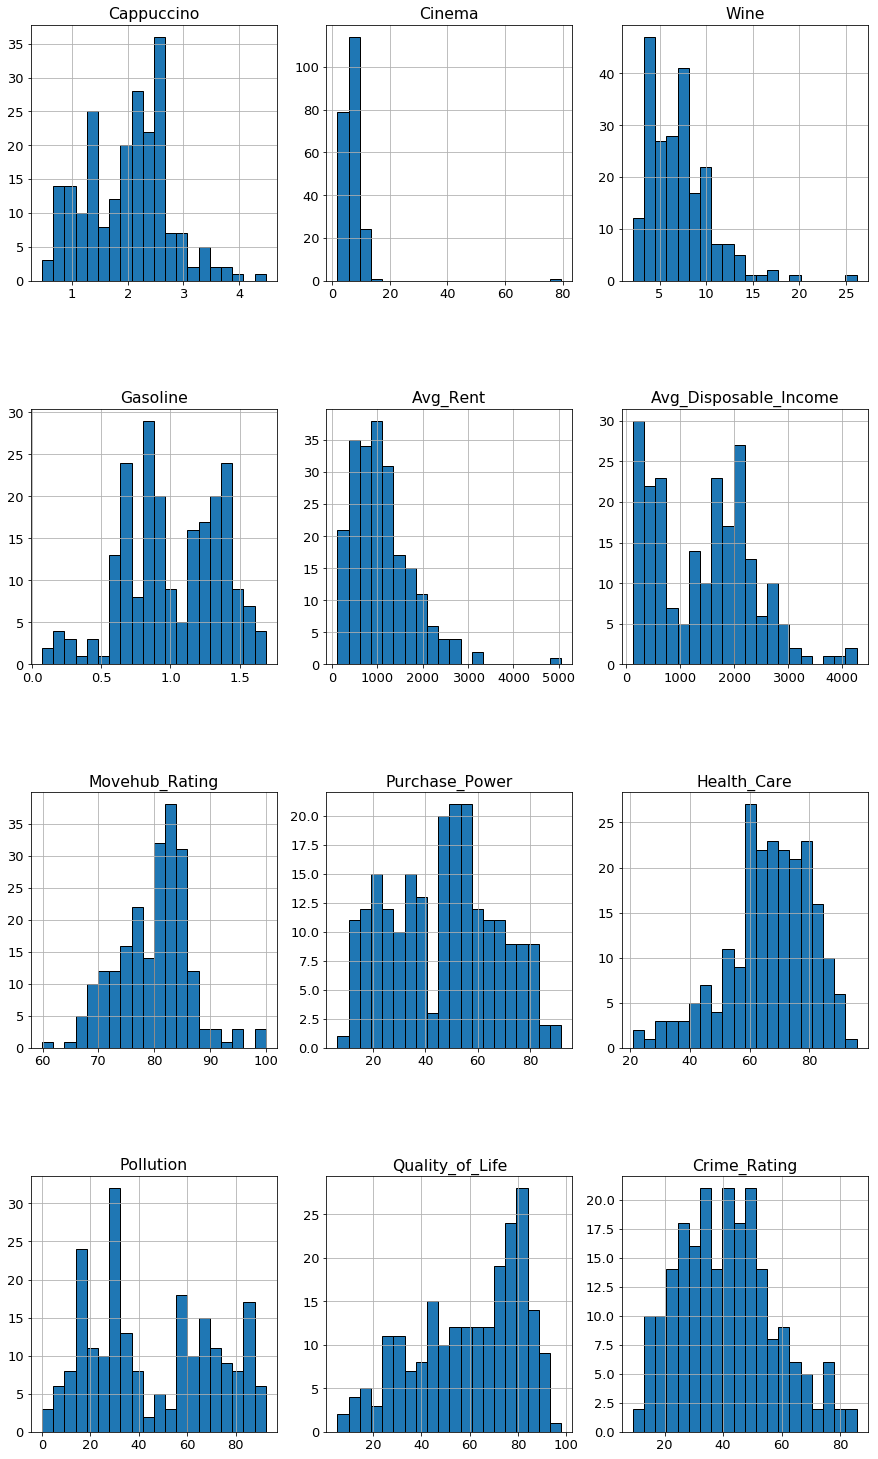

In [42]:
plt.rcParams.update({'font.size': 13})

columns=df_movehubcity.columns[1:13]
plt.subplots(figsize=(15,40))
length=len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df_movehubcity[i].hist(bins=20,edgecolor='black')
    plt.title(i)
    
plt.show()

Cappuccino                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Cinema                    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Wine                      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Gasoline                  AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Avg_Rent                    AxesSubplot(0.125,0.518913;0.168478x0.16413)
Avg_Disposable_Income    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Movehub_Rating           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Purchase_Power           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Health_Care                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
Pollution                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Quality_of_Life          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Crime_Rating             AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

<Figure size 720x360 with 0 Axes>

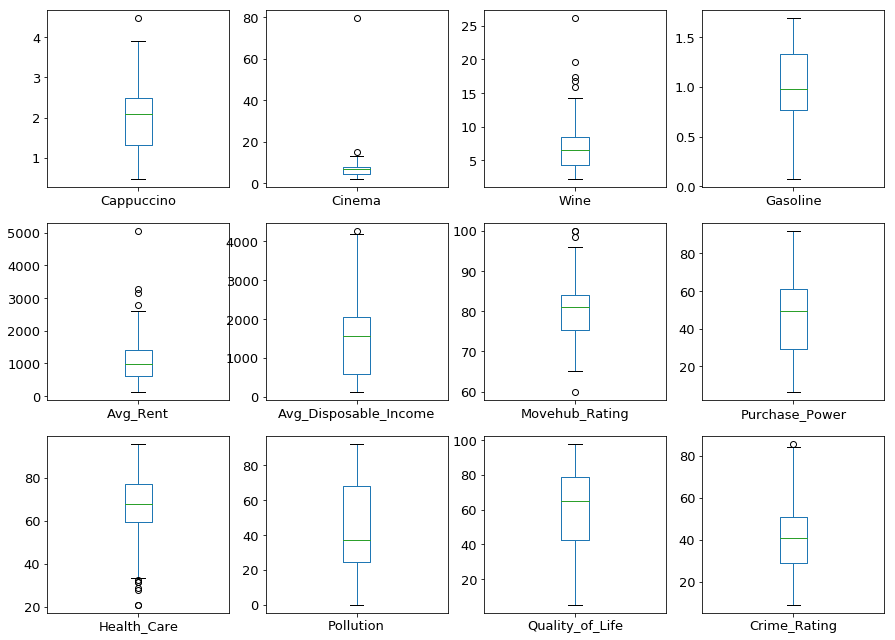

In [43]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(10,5))

df_movehubcity.plot(kind='box' , subplots=True, layout=(4,4), figsize=(15,15))



No gráfico abaixo, mostra a relação entre a renda média com o valor do aluguel.

Text(0.5,1,'\nRenda média disponível X Valor médio do aluguel\n')

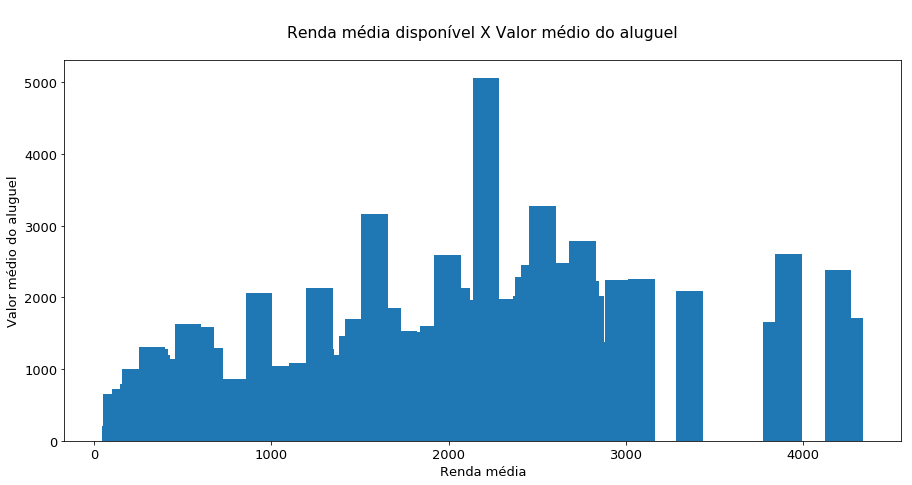

In [44]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(15,7))

print('\n')

plt.bar(df_movehubcity.Avg_Disposable_Income, df_movehubcity.Avg_Rent, width=150)
plt.xlabel('Renda média')
plt.ylabel('Valor médio do aluguel')
plt.title('\nRenda média disponível X Valor médio do aluguel\n')

In [45]:
# Criando varíavel para armazenar valores númericos para realizar correlação 

correlacao = df_movehubcity.drop(['City', 'Country'], axis = 1)
variables = correlacao

In [46]:
# Distribuição das classes

correlacao.corr(method = 'pearson')

,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating
Cappuccino,1.000000,0.332894,0.459300,0.116439,0.612890,0.707111,0.463900,0.485528,0.272443,-0.340583,0.492301,-0.193362
Cinema,0.332894,1.000000,0.296817,0.008513,0.260478,0.377315,0.310625,0.302875,0.142356,-0.259051,0.294522,-0.133922
Wine,0.459300,0.296817,1.000000,-0.393217,0.396755,0.282183,0.136347,0.116715,0.070316,-0.124615,0.052449,-0.050186
Gasoline,0.116439,0.008513,-0.393217,1.000000,0.081521,0.154712,0.142297,-0.005979,0.264003,-0.242046,0.180209,-0.298330
Avg_Rent,0.612890,0.260478,0.396755,0.081521,1.000000,0.675100,0.542362,0.385688,0.222707,-0.323976,0.348825,-0.146787
Avg_Disposable_Income,0.707111,0.377315,0.282183,0.154712,0.675100,1.000000,0.751426,0.830571,0.397638,-0.311728,0.789556,-0.236771
Movehub_Rating,0.463900,0.310625,0.136347,0.142297,0.542362,0.751426,1.000000,0.810494,0.384803,-0.258001,0.713844,-0.167520
Purchase_Power,0.485528,0.302875,0.116715,-0.005979,0.385688,0.830571,0.810494,1.000000,0.343616,-0.209063,0.841889,-0.174709
Health_Care,0.272443,0.142356,0.070316,0.264003,0.222707,0.397638,0.384803,0.343616,1.000000,-0.140971,0.507338,-0.246063
Pollution,-0.340583,-0.259051,-0.124615,-0.242046,-0.323976,-0.311728,-0.258001,-0.209063,-0.140971,1.000000,-0.316467,0.169596


In [47]:
# Criando Função Correlation Plot

def mostrar_correlacao(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

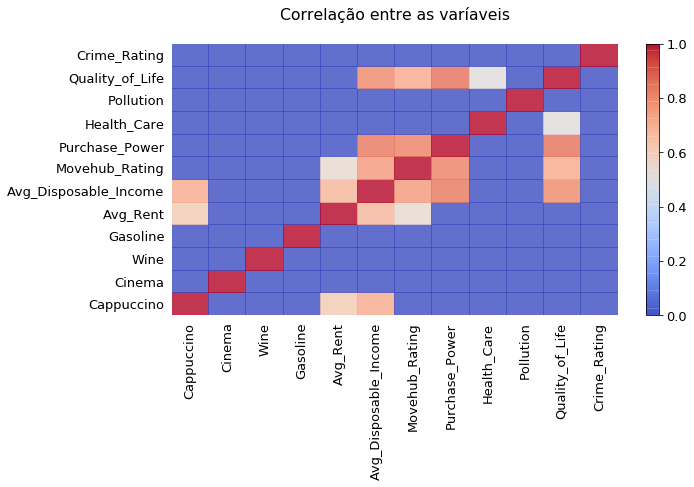

In [48]:
# Visualizando correlação entre as varíaveis

print('\n\n')

plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(10,5))
plt.title('Correlação entre as varíaveis\n')

mostrar_correlacao(correlacao, hurdle = 0.5)

print('\n\n')

In [49]:
# Função para criar o gráfico de dispersão.
# Compara as varíaveis independente que mais tem correlação linear com a varíavel dependente.

def corr_linear(coluna_independente, coluna_dependente, titulo_x, titulo_y):    
    plt.figure(figsize=(10,5))
    plt.rcParams.update({'font.size': 12})
    plt.scatter(coluna_independente, coluna_dependente)
    print('\n')
    plt.title(titulo_x+' X '+titulo_y)
    plt.xlabel(titulo_x)
    plt.ylabel(titulo_y)
    plt.show()

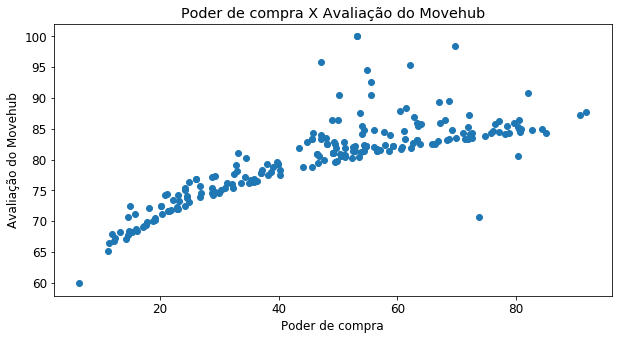

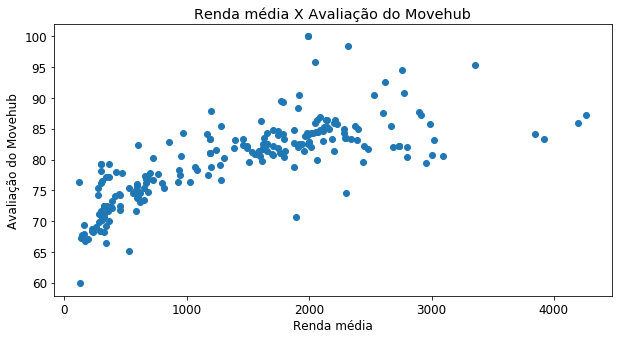

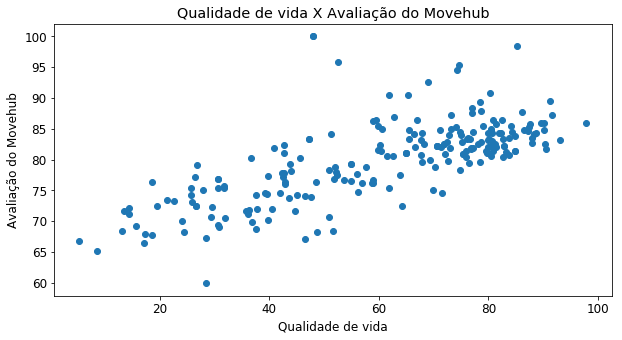

In [50]:
# Chamando a função para exibir os três gráficos


corr_linear(df_movehubcity.Purchase_Power, df_movehubcity.Movehub_Rating, "Poder de compra", "Avaliação do Movehub")

print('\n')

corr_linear(df_movehubcity.Avg_Disposable_Income, df_movehubcity.Movehub_Rating, "Renda média", "Avaliação do Movehub")

print('\n')

corr_linear(df_movehubcity.Quality_of_Life, df_movehubcity.Movehub_Rating, "Qualidade de vida", "Avaliação do Movehub")

print('\n')

In [157]:
# Criando varíavel para armazenar o dataset original

df_movehubcity_2 = df_movehubcity

In [158]:
# Criando varíavel para armazenar as colunas númericas para tratar valores OUTLIERS

df_out = df_movehubcity_2.drop(['City', 'Country'], axis = 1)

In [139]:
# Viualizar as primeiras linhas que devem ser a mesma do dataset original df_movehubcity

df_movehubcity_2.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Country
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,Germany
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22,United Kingdom
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86,United Arab Emirates
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04,Ethiopia
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32,Australia


Pesquisando OUTLIERS

In [140]:
df_movehubcity_2[df_movehubcity_2['Cappuccino'] > 4]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Country
206,Stavanger,4.48,10.65,13.44,1.68,2240.74,2957.77,79.41,46.59,62.48,29.13,76.5,20.83,Norway


In [141]:
df_movehubcity_2[df_movehubcity_2['Cinema'] > 70]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Country
190,Riyadh,1.69,79.49,17.43,0.08,610.14,1394.6,83.22,63.22,54.59,11.48,67.72,32.39,Saudi Arabia


In [142]:
df_movehubcity_2[df_movehubcity_2['Wine'] > 25]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Country
213,Tehran,1.96,2.62,26.15,0.37,980.65,392.26,72.13,18.09,43.98,87.62,14.33,54.16,Iran


In [143]:
df_movehubcity_2[df_movehubcity_2['Avg_Rent'] > 4000]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Country
105,Hong Kong,2.78,5.89,10.1,1.52,5052.31,2210.39,86.37,50.07,67.59,14.88,59.5,16.31,Hong Kong


In [144]:
df_movehubcity_2[df_movehubcity_2['Health_Care'] < 25]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Country
80,Dhaka,1.31,2.09,9.17,0.77,312.91,295.54,71.58,21.32,20.83,62.14,13.48,59.06,Bangladesh
103,Hanoi,1.31,2.66,8.17,0.81,718.36,172.25,66.77,12.22,20.83,24.02,5.29,51.81,Vietnam


In [145]:
df_movehubcity_2[df_movehubcity_2['Crime_Rating'] > 80]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Country
60,Caracas,1.80,9.12,11.97,0.07,1634.42,527.89,65.18,11.25,44.44,83.45,8.61,85.70,Venezuela
118,Johannesburg,1.16,3.46,3.53,0.84,705.63,1167.89,84.08,53.99,59.98,47.39,51.26,83.93,South Africa


Removendo OUTLIERS

In [147]:
# Cappuccino
df_movehubcity_2 = df_movehubcity_2.drop([206])

# Cinema
df_movehubcity_2 = df_movehubcity_2.drop([190])

# Wine
df_movehubcity_2 = df_movehubcity_2.drop([213])

# Avg_Rent
df_movehubcity_2 = df_movehubcity_2.drop([105])

# Health_Care
df_movehubcity_2 = df_movehubcity_2.drop([80])
df_movehubcity_2 = df_movehubcity_2.drop([103])

# Crime_Rating
df_movehubcity_2 = df_movehubcity_2.drop([60])

In [148]:
# Verificando o tamanho que ficou o dataset

df_movehubcity_2.shape

(213, 14)

## Preparando o modelo para machine learning

In [149]:
# Passando variáveis preditoras para X
# Passando variável target para Y

X = df_movehubcity_2.drop(['Movehub_Rating','Country','City'], axis = 1) 

Y = df_movehubcity_2['Movehub_Rating']

test_size=0.30
seed=0

In [151]:
# Vamos usar a Padronização (StandardScaler).
# Está técnica ajusta os coeficientes e torna a superfície de erros mais "tratável".

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=StandardScaler().fit_transform(X)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
# Utilização train_test_split, para dividir os dados em 70% para treino e 30% para teste

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [153]:
# Modelo regressão linear

reg_log = linear_model.LinearRegression()
reg_log.fit (X_train,Y_train)

Y_pred = reg_log.predict(X_test)

In [154]:
# Variância

from sklearn.metrics import explained_variance_score

explained_variance_score = explained_variance_score(Y_test, Y_pred)

In [155]:
# Erro médio quadrado e erro médio abasoluto

from sklearn.metrics import mean_squared_error

mean_squared_error=mean_squared_error(Y_test, Y_pred)

erro_medio_absoluto = mean_absolute_error(Y_test, Y_pred)

<br/>

### Métricas para avaliar o modelo

<br/>

<b>Coeficiente de determinação r^2:</b><br/>
O coeficiente de determinação r^2, é utilizado para medir o desempenho do modelo para realizar as previsões.
Os valores varia de 0 a 1, sendo o mais próximo de 1, melhor será a previsão em relação a variável dependente.

<b>Erro médio quadrado:</b><br/>
O erro médio quadrado, informa a que distância a reta de regressão está do conjunto de dados.
Quanto menor o valor, melhor é a distância.

<b>Erro médio absoluto:</b><br/>
Mede a diferença entre o valor previsto com o valor real.

<br/>

In [156]:
# Exibindo os resultados

print ("\nCoeficiente de determinação  r² com dados de treino:", round(reg_log.score(X_train,Y_train), 2) * 100,'%')

print ("\nCoeficiente de determinação r² com os dados de teste:", round(reg_log.score(X_test,Y_test), 2) * 100,'%')

print("\nErro médio quadrado: ", round(mean_squared_error))

print("\nErro médio absoluto:", round(erro_medio_absoluto))


Coeficiente de determinação  r² com dados de treino: 77.0 %

Coeficiente de determinação r² com os dados de teste: 78.0 %

Erro médio quadrado:  10.0

Erro médio absoluto: 2.0


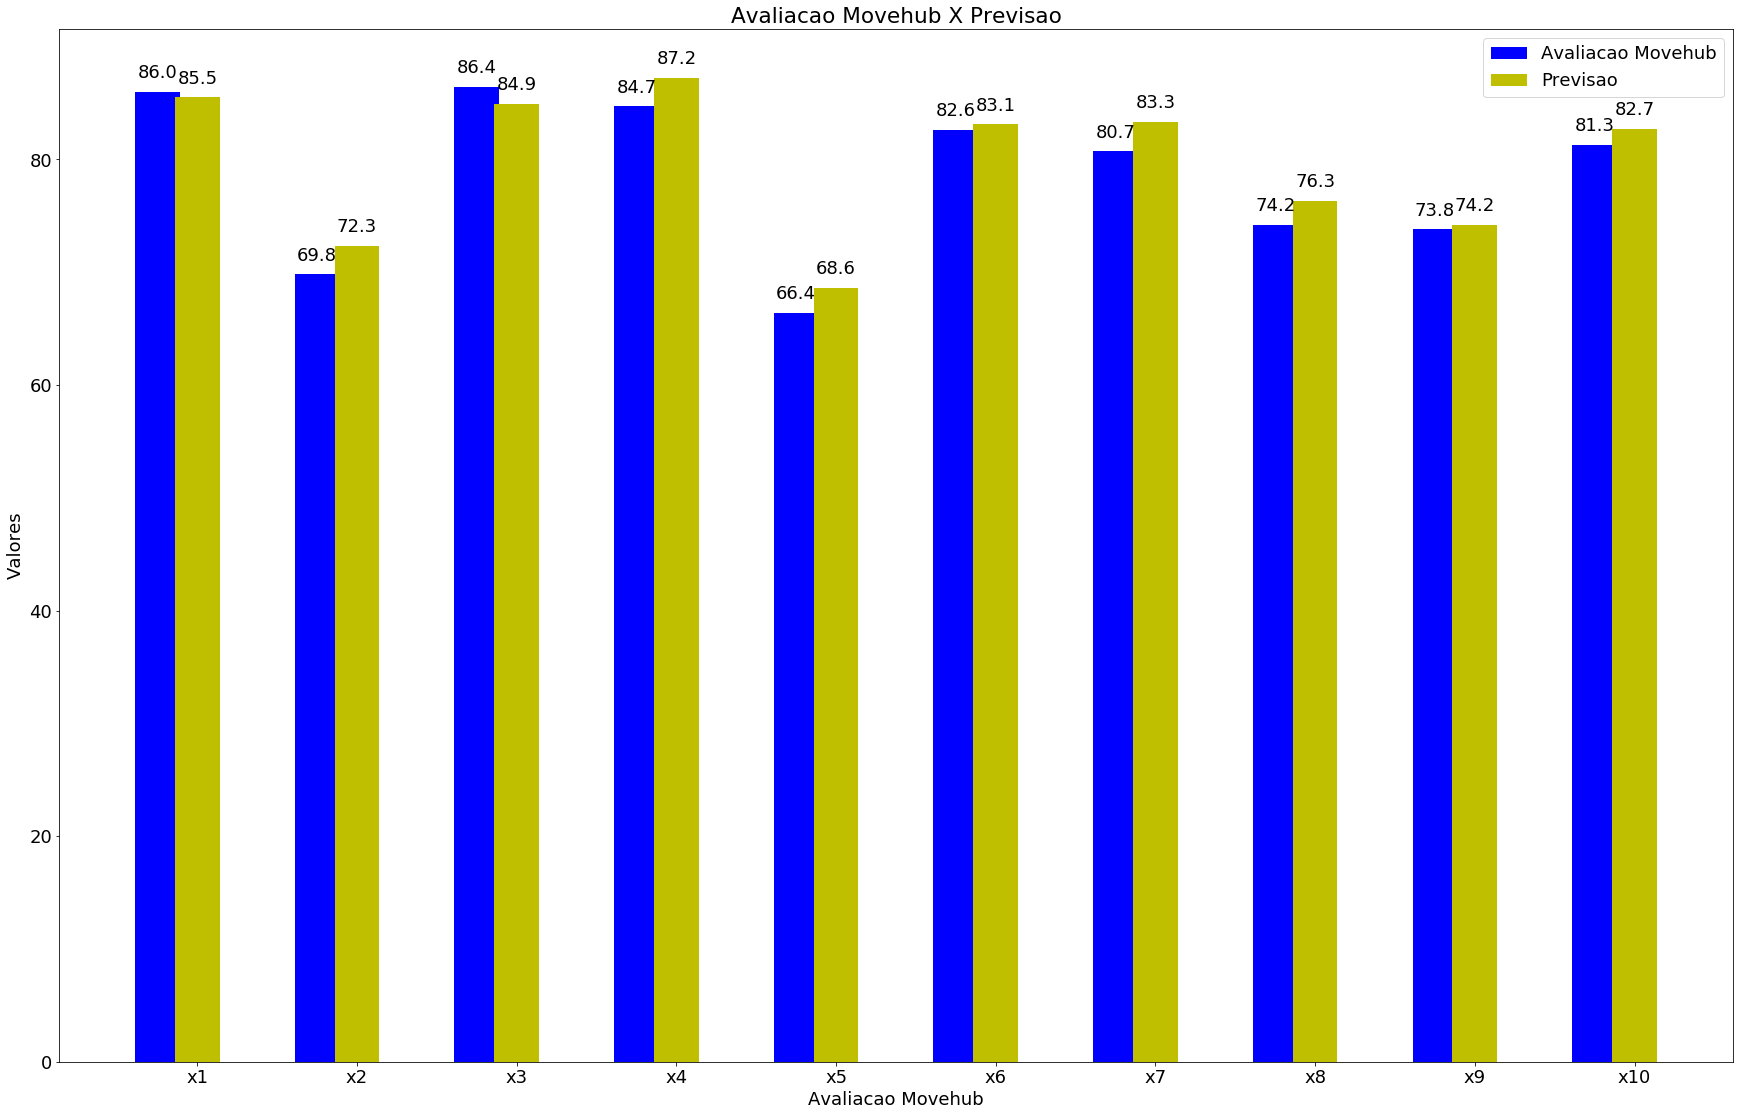



Tabela da comparação dos valores real e previstos:


,Avaliacao_Movehub,Previsao
0,86.00,85.478041
1,69.78,72.330493
2,86.37,84.865588
3,84.66,87.243821
4,66.42,68.598968
5,82.59,83.114850
6,80.68,83.321160
7,74.21,76.322571
8,73.84,74.200868
9,81.31,82.657885


In [69]:
# Resultado dos dados de teste.
# Vamos criar um gráfico que mostra a comparação e abaixo do gráfico, a tabela que gerou o gráfico.

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(30,19))

y_teste = Y_test[10:20]
y_teste = y_teste.round(1)

y_previsto = Y_pred[10:20]
y_previsto = y_previsto.round(1)

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(y_teste))
x2 = [x + 0.25 for x in x1]

# Plota as barras
rects1 = plt.bar(x1, y_teste, width=0.28, label = 'Avaliacao Movehub', color = 'b')
rects2 = plt.bar(x2, y_previsto, width=0.28, label = 'Previsao', color = 'y')

# Coloca o nome no X
valores = ['x1','x2','x3','x4','x5', 'x6','x7','x8','x9','x10']
plt.xticks([x + 0.25 for x in range(len(y_teste))], valores)

# Inseri uma legenda no gráfico
plt.legend()

plt.title("Avaliacao Movehub X Previsao")
plt.xlabel('Avaliacao Movehub')
plt.ylabel('Valores')

# Coloca os valores nas barras
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

print('\n')

plt.show()

print('\n')
print('Tabela da comparação dos valores real e previstos:')

pd.DataFrame(list(zip(Y_test[10:20], Y_pred[10:20])),columns=['Avaliacao_Movehub','Previsao'])

<br/>

# <font color='blue'>Conclusão</font>
<br/>
<b>
O desafio do MovehubCity, onde através do ranking, classifica se as cidades é boa ou não para se viver, trouxe vários tipos de possibilidades de aprendizado.
    

Foi realizado pesquisas sobre o assunto, para buscar entender a regra de negócio e entender o que os dados representam.

<br/>
Através da análise exploratória dos dados, foi analisado os tipos de dados, tipos de varíaveis, tamanho dos datasets, utilização de gráficos para visualizar o que os dados representam, análise descritiva, resumo estatístico e diversas análise.<br/>

Junto com a análise exploratória, foi realizado o tratamento dos dados.
Foi identificado e corrigido, outliers que são valores que foge da normalidade do conjunto de dados, nomes de cidades com erro de ortografia, verificado que tinha nomes ausentes de países, renomeação de variáveis, entre outras.

Para o processo da construção do modelo preditivo de regressão linear para machine learning, após realizar o pré-processamento dos dados, foi utilizado o aprendizagem supervisionado.<br/>
Foi definido já no começo do projeto, o label que foi a váriavel dependente.<br/>
Dividimos os dados em 70% para treino e 30% dos dados para teste.

No aprendizagem do modelo, foi utilizado os dados de treino.<br/>
Para o modelo final onde é realizado a avaliação da precisão de acerto, foi utilizado os dados de teste.

Na previssão realizada, o nosso modelo final teve resultado de 77.0% de precisão.

Para novas oportunidades, pode ser feitas novas análise com uso das variáveis, criar novos gráficos para procurar novas informações, realizar novas correlações, realizar outro metodo para tratar dados faltantes e outliers, utilizar Group By, realizar mais pesquisas, escolher as variáveis preditoras que contém valores maiores de correlação para treinar o modelo, e buscar uma melhor precisão.

Conclui-se que o modelo criado, teve vários processos de aprendizagem sobre ciência de dados, e o resultado da previsão pode ter obtido um bom percentual para realizar novas previsões para classificar o ranking das cidades.
</b>

<br/>